In [1]:
try:
    get_ipython().run_line_magic("reset", "-f")
except NameError:
    is_notebook = False
    p = print
else:
    is_notebook = True
    p = display
    # p = print

import warnings
warnings.simplefilter("ignore")

import pandas as pd
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)

if is_notebook:
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.rcParams["figure.figsize"] = (10, 2)

In [2]:
data_dir = f"../datasets/march-machine-learning-mania-2025"

MNCAATourneyDetailedResults     1,382 32 2003 2024
MRegularSeasonDetailedResults 117,748 32 2003 2025
WNCAATourneyDetailedResults       894 32 2010 2024
WRegularSeasonDetailedResults  80,626 32 2010 2025
--------------------------------------------------
detailed_results              200,650 32 2003 2025

['Season', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']


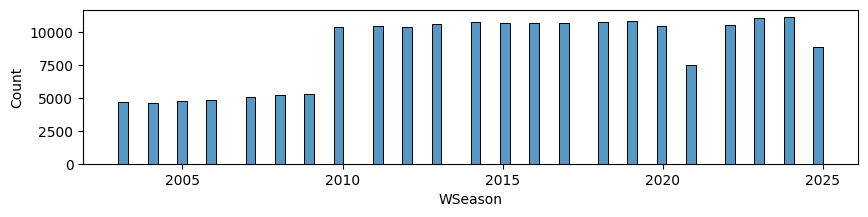

In [3]:
def read_detailed_results(fn):
    df = pd.read_csv(f"{data_dir}/{fn}.csv")
    for c in df.select_dtypes("int64"):
        df[c] = df[c].astype("int32")
    df = df.rename(columns={"Season": "WSeason"})
    df["LSeason"] = df["WSeason"]
    df = df.drop(columns=["DayNum", "NumOT", "WLoc"])
    df.index = df.index.astype("int32")
    assert all(df[c].dtype == "int32" for c in df)
    assert df.index.dtype == "int32"
    print(
        f"{fn:<29} {df.shape[0]:>7,} {df.shape[1]:>2} {df['WSeason'].min()} {df['WSeason'].max()}"
    )
    return df


MNCAATourneyDetailedResults = read_detailed_results("MNCAATourneyDetailedResults")
MRegularSeasonDetailedResults = read_detailed_results("MRegularSeasonDetailedResults")
WNCAATourneyDetailedResults = read_detailed_results("WNCAATourneyDetailedResults")
WRegularSeasonDetailedResults = read_detailed_results("WRegularSeasonDetailedResults")

detailed_results = pd.concat(
    [
        MNCAATourneyDetailedResults,
        MRegularSeasonDetailedResults,
        WNCAATourneyDetailedResults,
        WRegularSeasonDetailedResults,
    ]
).reset_index(drop=True)

print(
    f"{'-'*50}\n{'detailed_results':<29} {detailed_results.shape[0]:>7,} {detailed_results.shape[1]:>2} {detailed_results['WSeason'].min()} {detailed_results['WSeason'].max()}"
)
assert 0 == len([c for c in detailed_results if c[0] not in ("W", "L")])
print(f"\n{[c[1:] for c in detailed_results if c[0] == 'W']}")

if is_notebook:
    sns.histplot(detailed_results["WSeason"]);

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1421,92,32,69,11,29,17,26,14,30,17,12,5,3,22
1,2003,1112,80,31,66,7,23,11,14,11,36,22,16,10,7,8
2,2003,1113,84,31,59,6,14,16,22,10,27,18,9,7,4,19
3,2003,1141,79,29,53,3,7,18,25,11,20,15,18,13,1,19
4,2003,1143,76,27,64,7,20,15,23,18,20,17,13,8,2,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401295,2025,3416,58,23,63,7,26,5,11,15,21,11,12,4,2,21
401296,2025,3428,64,25,58,5,23,9,16,8,18,16,11,8,6,20
401297,2025,3194,39,10,55,3,17,16,23,4,25,5,10,4,3,9
401298,2025,3150,52,18,58,5,17,11,14,7,24,5,15,8,2,15


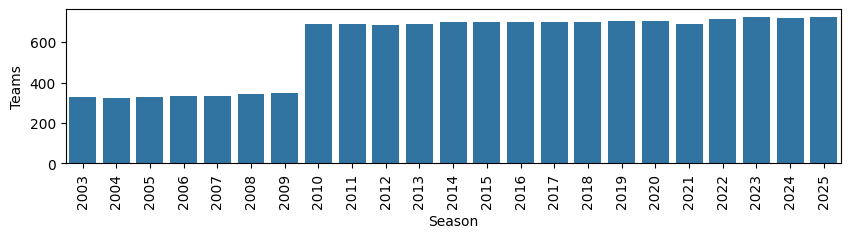

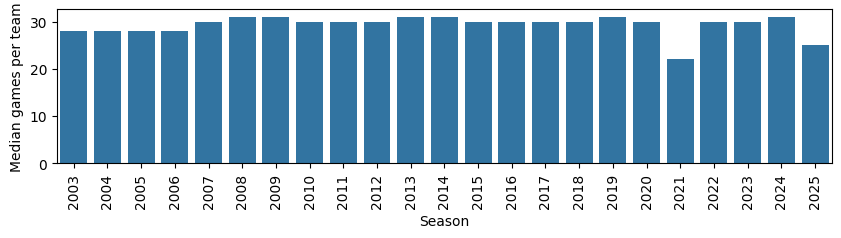

In [4]:
def drop_WL(W_or_L):
    df = detailed_results[[c for c in detailed_results if c[0] == W_or_L]]
    return df.rename(columns={c: c[1:] for c in df})


game_team = pd.concat([drop_WL("W"), drop_WL("L")]).reset_index(drop=True)
p(game_team)

if is_notebook:
    sns.barplot(
        game_team.groupby("Season")["TeamID"].nunique().reset_index(name="Teams"),
        x="Season",
        y="Teams",
    )

    plt.xticks(rotation=90)
    plt.figure()

    sns.barplot(
        game_team.groupby(["Season", "TeamID"])["Score"]
        .count()
        .reset_index()
        .groupby("Season")["Score"]
        .median()
        .reset_index(name="Median games per team"),
        x="Season",
        y="Median games per team",
    )

    plt.xticks(rotation=90);